# SVM(Support Vector Machine)
---
- ML에서 오랫동안 연구되었고 성능이 좋은 모델
- DL보다 성능이 좋은 경우도 있음

In [190]:
# 모듈 로딩
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# [1] 데이터 준비

In [191]:
digit = load_digits()
data = digit['data']
target = digit['target']

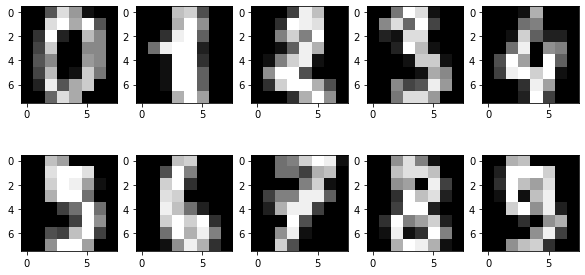

In [198]:
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
j = 0
for i in range(2):
    for ii in range(5):
        axs[i][ii].imshow(digit['images'][j])
        plt.gray()
        j += 1
plt.show()

# [2] 학습 데이터 준비

In [193]:
trainX, testX, trainY, testY = train_test_split(data, target, test_size=0.2)

# SVC모듈 활용을 위한 스케일링
scaler = MinMaxScaler()
scaler.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

# [3] 모델 생성

In [194]:
lr = LogisticRegression(max_iter=10000)
svc = SVC(gamma=0.01, max_iter=10000, probability=True)
model_lr = lr.fit(trainX, trainY)
model_svc = svc.fit(trainX_scaled, trainY)

# [4] 모델 평가

In [195]:
print('로지스틱 train 점수 :', model_lr.score(trainX, trainY))
print('로지스틱 test 점수 :', model_lr.score(testX, testY))
print('SVC train 점수 :', model_svc.score(trainX_scaled, trainY))
print('SVC test 점수 :', model_svc.score(testX_scaled, testY))

로지스틱 train 점수 : 1.0
로지스틱 test 점수 : 0.9722222222222222
SVC train 점수 : 0.9596381350034795
SVC test 점수 : 0.9583333333333334


# [5] 예측값 확인

In [197]:
for i in range(10):
    print(f'{i}일 확률', np.round(model_lr.predict_proba([digit['data'][8]])[0][i],2
                               )*100)
print('로지스틱 모델 예측결과 :', model_lr.predict([digit['data'][8]]))
for i in range(10):
    print(f'{i}일 확률', np.round(scaler.transform([digit['data'][4]])[0][i])*100)

print('SVC 모델 예측결과 :', model_svc.predict(scaler.transform([digit['data'][4]])))

0일 확률 0.0
1일 확률 0.0
2일 확률 0.0
3일 확률 0.0
4일 확률 0.0
5일 확률 0.0
6일 확률 0.0
7일 확률 0.0
8일 확률 100.0
9일 확률 0.0
로지스틱 모델 예측결과 : [8]
0일 확률 0.0
1일 확률 0.0
2일 확률 0.0
3일 확률 0.0
4일 확률 100.0
5일 확률 0.0
6일 확률 0.0
7일 확률 0.0
8일 확률 0.0
9일 확률 0.0
SVC 모델 예측결과 : [4]
